In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter
from scipy.signal import lfilter
%matplotlib inline
import pandas as pd
# import matplotlib 
# matplotlib.font_manager._rebuild()
import datetime as dt
import csv

In [2]:
today = dt.datetime.today()
now = dt.datetime.now()
print(today)
print('*'*30)
print(now)

# time_str = ""
# time_arr = []
# time_arr.append(now.year)
# time_arr.append(now.month)
# print(time_arr)
# time_str = str(now.year) + ":" + str(now.month)+ ":" +str(now.year) + ":" + str(now.month)
# print(time_str)

print(now.strftime('%H:%M:%S')+":"+str(now.microsecond))

2021-06-02 18:10:23.791930
******************************
2021-06-02 18:10:23.791971
18:10:23:791971


In [12]:
temp = pd.read_csv('data_0530/4차/Rawdata.txt',delimiter='\t',encoding='cp949')
t_fp1 = temp['Time']
e_fp1 = temp['EEG_Fp1']

# type(t_fp1)

# pd.concat([t_fp1,e_fp1],axis=1)
# test_df = temp#temp.set_index('Time')
# test_df = test_df.drop('PPG',axis=1)
# test_df = test_df.drop('EEG_Fp2',axis=1)
# test_df

In [13]:
# data = pd.read_excel('0529분석_박현지.xlsx')
# fp1 = data['EEG_Fp1']

# odd = fp1[0::2]
# print(odd)
# print(fp1)

In [14]:
def butter_lowpass(cutoff, fs, order=9):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=9):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

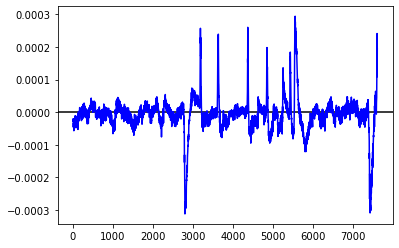

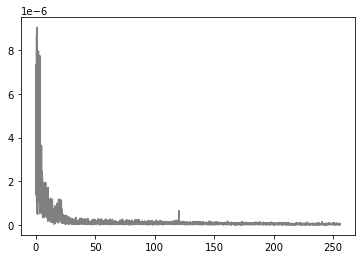

In [15]:
x = range(0,len(e_fp1))
N = len(e_fp1)
Fs = 512
k = np.arange(N)

T = N/Fs
freq = k / T
freq = freq[range(int(N/2))]

yfft = np.fft.fft(e_fp1)
yf = yfft / N
yf = yf[range(int(N/2))]

plt.axhline(color='black')
plt.plot(x, e_fp1, 'b', label='origin')
plt.show()

plt.plot(freq,abs(yf),'gray')
plt.show()

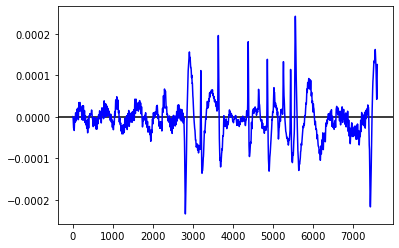

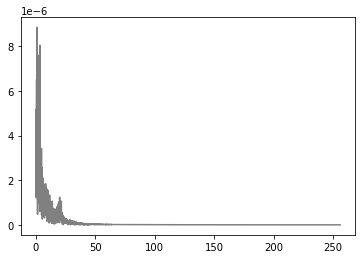

In [16]:
# cutoff = 30.
# lpf = butter_lowpass_filter(fp1, cutoff, Fs, order=9)
lowcut = 0.5 #500.0
highcut = 30 #1250.0
m_lpf = butter_bandpass_filter(e_fp1,lowcut, highcut, Fs, order=5)
yfft = np.fft.fft(m_lpf)
yf = yfft / N
yf = yf[range(int(N/2))]

plt.axhline(color='black')
plt.plot(x, m_lpf, 'b', label='origin')

# plt.xlim(500,600)
# plt.xlim(1250,1350)
# plt.ylim(-0.0001,0.0003)
plt.show()



plt.plot(freq,abs(yf),'gray')
plt.show()

In [17]:
df = pd.DataFrame(m_lpf)
df

,0
0,-2.732069e-09
1,-2.682944e-08
2,-1.300499e-07
3,-4.218637e-07
4,-1.045884e-06
...,...
7601,8.568833e-05
7602,9.576512e-05
7603,1.060171e-04
7604,1.161399e-04


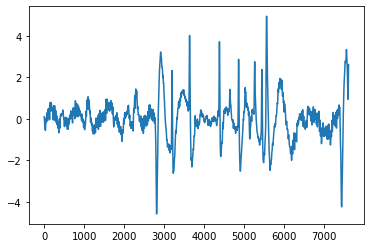

In [18]:
norm_df = (df - df.mean())/df.std()
norm_df

plt.plot(norm_df)
plt.show()

In [257]:
import os
df = pd.DataFrame(m_lpf)
df
# .to_csv 
# 최초 생성 이후 mode는 append
if not os.path.exists('박현지filtered/현4filtered.csv'):
    df.to_csv('박현지filtered/현4filtered.csv', index=False, mode='w', encoding='utf-8-sig')
else:
    df.to_csv('박현지filtered/현4filtered.csv', index=False, mode='a', encoding='utf-8-sig', header=False)

In [220]:
from numpy import dot

In [221]:
def L2(inp):
    result = 0
    for i in inp:
        result += i ** 2
    return np.sqrt(result)

In [223]:
def cos_sim(inp1, inp2):
    return dot(inp1, inp2)/(L2(inp1) * L2(inp2))

In [286]:
y1 = m_lpf[1250:1350]
y2 = m_lpf[1240:1340]

In [287]:
cos_sim(y1,y2)

0.7071230193167238

In [ ]:
# threading.Timer(0.01,iter).start()